# <b>Assignment : DT</b>

<font color='red'><b> Please check below video before attempting this assignment</b></font>

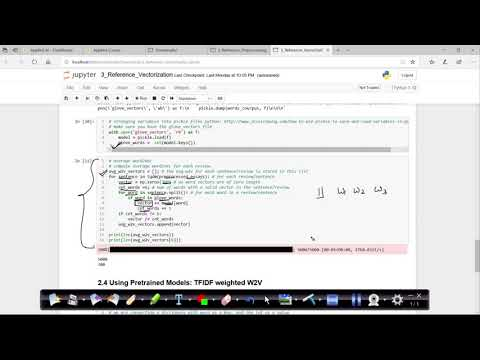

In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo('ZhLXULFjIjQ', width="1000",height="500")

<font color='red'><b> TF-IDFW2V</b></font>

<b>Tfidf w2v (w1,w2..) = (tfidf(w1) * w2v(w1) + tfidf(w2) * w2v(w2) + …)  /    (tfidf(w1) + tfidf(w2) + …)</b>

<b>(Optional) Please check course video on [AVgw2V and TF-IDFW2V ](https://www.appliedaicourse.com/lecture/11/applied-machine-learning-online-course/2916/avg-word2vec-tf-idf-weighted-word2vec/3/module-3-foundations-of-natural-language-processing-and-machine-learning)for more details.

<font color='blue'><b>Glove vectors </b></font>

<b>In this assignment you will be working with glove vectors , please check  [this](https://en.wikipedia.org/wiki/GloVe_(machine_learning)) and [this](https://en.wikipedia.org/wiki/GloVe_(machine_learning)) for more details.</b><br>

Download glove vectors from this [link ](https://drive.google.com/file/d/1lDca_ge-GYO0iQ6_XDLWePQFMdAA2b8f/view?usp=sharing)

In [ ]:
#please use below code to load glove vectors 
import pickle
import pandas
import seaborn as sns
with open('glove_vectors', 'rb') as f:
    model = pickle.load(f)
    glove_words =  set(model.keys())

In [ ]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [ ]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
# import nltk
# nltk.download('vader_lexicon')

sid = SentimentIntensityAnalyzer()

sentiment = 'a person is a person no matter how small dr seuss i teach the smallest students with the biggest enthusiasm \
for learning my students learn in many different ways using all of our senses and multiple intelligences i use a wide range\
of techniques to help all my students succeed students in my class come from a variety of different backgrounds which makes\
for wonderful sharing of experiences and cultures including native americans our school is a caring community of successful \
learners which can be seen through collaborative student project based learning in and out of the classroom kindergarteners \
in my class love to work with hands on materials and have many different opportunities to practice a skill before it is\
mastered having the social skills to work cooperatively with friends is a crucial aspect of the kindergarten curriculum\
montana is the perfect place to learn about agriculture and nutrition my students love to role play in our pretend kitchen\
in the early childhood classroom i have had several kids ask me can we try cooking with real food i will take their idea \
and create common core cooking lessons where we learn important math and writing concepts while cooking delicious healthy \
food for snack time my students will have a grounded appreciation for the work that went into making the food and knowledge \
of where the ingredients came from as well as how it is healthy for their bodies this project would expand our learning of \
nutrition and agricultural cooking recipes by having us peel our own apples to make homemade applesauce make our own bread \
and mix up healthy plants from our classroom garden in the spring we will also create our own cookbooks to be printed and \
shared with families students will gain math and literature skills as well as a life long enjoyment for healthy cooking \
nannan'

sample_sentence = sid.polarity_scores(sentiment)

for i in sample_sentence:
  print('{0}:{1}'.format(i,sample_sentence[i]),end='')
 
sample_sentence

neg:0.01neu:0.745pos:0.245compound:0.9975

{'neg': 0.01, 'neu': 0.745, 'pos': 0.245, 'compound': 0.9975}

<h1> Decision Tree </h1>

# <font color='red'> <b>Task - 1</b></font>

## 1.1 Loading Data

In [ ]:
#make sure you are loading atleast 50k datapoints
#you can work with features of preprocessed_data.csv for the assignment.
import pandas as pd
import numpy as np
import tqdm
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

data = pandas.read_csv('preprocessed_data.csv',nrows=50000)#importing only 50k records
data.shape


(50000, 9)

In [ ]:
Y = data['project_is_approved']
X = data.drop(['project_is_approved'],axis=1)
X.head(5)

,school_state,teacher_prefix,project_grade_category,teacher_number_of_previously_posted_projects,clean_categories,clean_subcategories,essay,price
0,ca,mrs,grades_prek_2,53,math_science,appliedsciences health_lifescience,i fortunate enough use fairy tale stem kits cl...,725.05
1,ut,ms,grades_3_5,4,specialneeds,specialneeds,imagine 8 9 years old you third grade classroo...,213.03
2,ca,mrs,grades_prek_2,10,literacy_language,literacy,having class 24 students comes diverse learner...,329.00
3,ga,mrs,grades_prek_2,2,appliedlearning,earlydevelopment,i recently read article giving students choice...,481.04
4,wa,mrs,grades_3_5,2,literacy_language,literacy,my students crave challenge eat obstacles brea...,17.74


In [ ]:
#data splitting
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.33,stratify = Y)
print(x_train.shape,y_train.shape)


(33500, 8) (33500,)


In [ ]:
x_train,x_cv,y_train,y_cv = train_test_split(x_train,y_train,test_size=0.33,stratify = y_train)
print(y_train.shape)
print(x_train.shape)

(22445,)
(22445, 8)


Encoding the feature essays

In [ ]:
vect_essay1 = TfidfVectorizer(min_df=10,ngram_range=(1,4),max_features=5000)
vect_essay1.fit(x_train['essay'].values)#fitting the essay in x_train

dict1 = dict(zip(vect_essay1.get_feature_names(),list(vect_essay1.idf_)))
wrd_tfidf = set(vect_essay1.get_feature_names()) 

x_tr_ess_tfidf = vect_essay1.transform(x_train['essay'].values)
x_cv_ess_tfidf = vect_essay1.transform(x_cv['essay'].values)
x_te_ess_tfidf = vect_essay1.transform(x_test['essay'].values)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
x_tr_ess_tfidf_w2v = [] #for train data
for sent in x_train['essay'].values:
  vect = np.zeros(300)
  tfidf_w = 0
  for wrd in sent.split():
    if(wrd in glove_words) and (wrd in wrd_tfidf):
      v = model[wrd]
      tfidf = dict1[wrd]*(sent.count(wrd)/len(sent.split()))
      vect = vect + (v*tfidf)
      tfidf_w = tfidf_w + tfidf
  if tfidf_w != 0:
    vect = vect/tfidf_w
    x_tr_ess_tfidf_w2v.append(vect)

print(len(x_tr_ess_tfidf_w2v))
print(len(x_tr_ess_tfidf_w2v[0]))




22445
300


In [ ]:
x_cv_ess_tfidf_w2v = [] #for cv data
for sent in x_cv['essay'].values:
  vect = np.zeros(300)
  tfidf_w = 0
  for wrd in sent.split():
    if(wrd in glove_words) and (wrd in wrd_tfidf):
      v = model[wrd]
      tfidf = dict1[wrd]*(sent.count(wrd)/len(sent.split()))
      vect = vect + (v*tfidf)
      tfidf_w = tfidf_w + tfidf
  if tfidf_w != 0:
    vect = vect/tfidf_w
    x_cv_ess_tfidf_w2v.append(vect)

print(len(x_cv_ess_tfidf_w2v))
print(len(x_cv_ess_tfidf_w2v[0]))




11055
300


In [ ]:
x_te_ess_tfidf_w2v = [] #for test data
for sent in x_test['essay'].values:
  vect = np.zeros(300)
  tfidf_w = 0
  for wrd in sent.split():
    if(wrd in glove_words) and (wrd in wrd_tfidf):
      v = model[wrd]
      tfidf = dict1[wrd]*(sent.count(wrd)/len(sent.split()))
      vect = vect + (v*tfidf)
      tfidf_w = tfidf_w + tfidf
  if tfidf_w != 0:
    vect = vect/tfidf_w
    x_te_ess_tfidf_w2v.append(vect)

print(len(x_te_ess_tfidf_w2v))
print(len(x_te_ess_tfidf_w2v[0]))




16500
300


categorical features and numerical features

In [ ]:
#school state
school_vec = CountVectorizer(min_df=10,ngram_range=(1,4),max_features=5000)
school_vec.fit(x_train['school_state'].values)
x_tr_school = school_vec.transform(x_train['school_state'].values)
x_te_school = school_vec.transform(x_test['school_state'].values)
x_cv_school = school_vec.transform(x_cv['school_state'].values)

#project_grade_category
project_vec = CountVectorizer(min_df=10,ngram_range=(1,4),max_features=5000)
project_vec.fit(x_train['project_grade_category'].values)
x_tr_project = project_vec.transform(x_train['project_grade_category'].values)
x_te_project = project_vec.transform(x_test['project_grade_category'].values)
x_cv_project = project_vec.transform(x_cv['project_grade_category'].values)

#teacher_prefix
prefix_vec = CountVectorizer(min_df=10,ngram_range=(1,4),max_features=5000)
prefix_vec.fit(x_train['teacher_prefix'].values)
x_tr_prefix = prefix_vec.transform(x_train['teacher_prefix'].values)
x_te_prefix = prefix_vec.transform(x_test['teacher_prefix'].values)
x_cv_prefix = prefix_vec.transform(x_cv['teacher_prefix'].values)

#clean_subcategories
subcat_vec = CountVectorizer(min_df=10,ngram_range=(1,4),max_features=5000)
subcat_vec.fit(x_train['clean_subcategories'].values)
x_tr_subcat = subcat_vec.transform(x_train['clean_subcategories'].values)
x_te_subcat = subcat_vec.transform(x_test['clean_subcategories'].values)
x_cv_subcat = subcat_vec.transform(x_cv['clean_subcategories'].values)

#clean_categories
cat_vec = CountVectorizer(min_df=10,ngram_range=(1,4),max_features=5000)
cat_vec.fit(x_train['clean_categories'].values)
x_tr_cat = cat_vec.transform(x_train['clean_categories'].values)
x_te_cat = cat_vec.transform(x_test['clean_categories'].values)
x_cv_cat = cat_vec.transform(x_cv['clean_categories'].values)

type(x_tr_prefix)




scipy.sparse.csr.csr_matrix

In [ ]:
from sklearn.preprocessing import Normalizer

n1 = Normalizer()

#normalizer for price
x_tr_price = n1.fit_transform(x_train['price'].values.reshape(1,-1).reshape(-1,1))
x_te_price = n1.fit_transform(x_test['price'].values.reshape(1,-1).reshape(-1,1))
x_cv_price = n1.fit_transform(x_cv['price'].values.reshape(1,-1).reshape(-1,1))

#normalizer for teachers number of previously posted projects
x_tr_prev_project = n1.fit_transform(x_train['price'].values.reshape(1,-1).reshape(-1,1))
x_te_prev_project = n1.fit_transform(x_test['price'].values.reshape(1,-1).reshape(-1,1))
x_cv_prev_project = n1.fit_transform(x_cv['price'].values.reshape(1,-1).reshape(-1,1))


In [ ]:
sentiment_tr = x_train['essay'].apply(sid.polarity_scores).apply(pd.Series)
sentiment_te = x_test['essay'].apply(sid.polarity_scores).apply(pd.Series)
sentiment_cv = x_cv['essay'].apply(sid.polarity_scores).apply(pd.Series)
sentiment_tr

,neg,neu,pos,compound
41613,0.008,0.701,0.291,0.9907
27261,0.043,0.674,0.283,0.9885
3146,0.051,0.646,0.303,0.9954
15268,0.079,0.758,0.162,0.8532
44555,0.000,0.705,0.295,0.9876
...,...,...,...,...
742,0.010,0.829,0.161,0.9719
14621,0.036,0.719,0.245,0.9885
45010,0.182,0.587,0.232,0.4803
39715,0.000,0.776,0.224,0.9783


stacking up all features

In [ ]:
from scipy.sparse import hstack

#for set1
x_tr1 = hstack((x_tr_ess_tfidf,x_tr_school,x_tr_project,x_tr_prefix,x_tr_subcat,x_tr_cat,x_tr_price,x_tr_prev_project,sentiment_tr)).tocsr()
x_cv1 = hstack((x_cv_ess_tfidf,x_cv_school,x_cv_project,x_cv_prefix,x_cv_subcat,x_cv_cat,x_cv_price,x_cv_prev_project,sentiment_cv)).tocsr()
x_te1 = hstack((x_te_ess_tfidf,x_te_school,x_te_project,x_te_prefix,x_te_subcat,x_te_cat,x_te_price,x_te_prev_project,sentiment_te)).tocsr()


In [ ]:
#for set2
x_tr2 = hstack((x_tr_ess_tfidf_w2v,x_tr_school,x_tr_project,x_tr_prefix,x_tr_subcat,x_tr_cat,x_tr_price,x_tr_prev_project,sentiment_tr)).tocsr()
x_cv2 = hstack((x_cv_ess_tfidf_w2v,x_cv_school,x_cv_project,x_cv_prefix,x_cv_subcat,x_cv_cat,x_cv_price,x_cv_prev_project,sentiment_cv)).tocsr()
x_te2 = hstack((x_te_ess_tfidf_w2v,x_te_school,x_te_project,x_te_prefix,x_te_subcat,x_te_cat,x_te_price,x_te_prev_project,sentiment_te)).tocsr()


In [ ]:
print(y_train.shape)
x_tr1.shape

Decision Tree

Cross Validation 

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

tr_auc1 = []
tr_auc2 = []
cv_auc1 = []
cv_auc2 = []

alpha_depth = [1, 3, 10, 30] 
aplha_split_min = [5,10,100,500]



GridSearchCV

In [ ]:
#SET 1 Decision tree classifier

dtc = DecisionTreeClassifier(class_weight='balanced')
params ={'max_depth':alpha_depth,'min_samples_split':aplha_split_min}
clf = GridSearchCV(dtc,params,cv=3,scoring='roc_auc',return_train_score = True)
clf.fit(x_tr1,y_train)
final1 = pd.DataFrame.from_dict(clf.cv_results_)

tr_auc1 = final1['mean_train_score']
cv_auc1 = final1['mean_train_score']

x1 = final1['param_min_samples_split']
y1 = final1['param_max_depth']

depthbest1 = clf.best_params_['max_depth']
minsplitbest1 = clf.best_params_['min_samples_split']

#SET 2 Decision tree classifier

clf.fit(x_tr2,y_train)
final2 = pd.DataFrame.from_dict(clf.cv_results_)

tr_auc2 = final1['mean_train_score']
cv_auc2 = final1['mean_train_score']

x2 = final1['param_min_samples_split']
y2 = final1['param_max_depth']

depthbest2 = clf.best_params_['max_depth']
minsplitbest2 = clf.best_params_['min_samples_split']




In [ ]:
import plotly.offline as offline
import plotly.graph_objs as go
import matplotlib.pyplot as plt
import numpy as np

offline.init_notebook_mode()

def plot_3d(X,Y,tr_auc,cv_auc):
  t1 = go.Scatter3d(x=X,y=Y,z=tr_auc,name='train')
  t2 = go.Scatter3d(x=X,y=Y,z=cv_auc,name='crossvalidation')

  data = [t1,t2]

#https://plotly.com/python/3d-axes/

  layout = go.Layout(scene=dict(
      xaxis = dict(title ='estimator_n'),
      yaxis = dict(title = 'max depth'),
      zaxis = dict(title = 'Auc score'),))
  
  figs = go.Figure(data = data, layout = layout,)
  offline.iplot(figs,filename='3d-scatter-colorscale')

plot_3d(x1,y1,tr_auc1,cv_auc1)
plot_3d(x2,y2,tr_auc2,cv_auc2)






In [ ]:
print("min_sample_split:{0} and max_depth:{1}".format(depthbest1,minsplitbest1))
print("min_sample_split:{0} and max_depth:{1}".format(depthbest2,minsplitbest2))


min_sample_split:10 and max_depth:500
min_sample_split:10 and max_depth:500


In [ ]:
from sklearn.metrics import roc_curve,auc

data_te1 = DecisionTreeClassifier(class_weight='balanced',min_samples_split = minsplitbest1,max_depth=depthbest1)
data_te1.fit(x_tr1,y_train)



data_te2 = DecisionTreeClassifier(class_weight='balanced',min_samples_split = minsplitbest2,max_depth=depthbest2)
data_te2.fit(x_tr2,y_train)


y_tr_pred1 = data_te1.predict_proba(x_tr1)[:,1]
y_te_pred1 = data_te1.predict_proba(x_te1)[:,1]


y_tr_pred2 = data_te2.predict_proba(x_tr2)[:,1]
y_te_pred2 = data_te2.predict_proba(x_te2)[:,1]


fpr_train1,tpr_train1,threshold_tr1 = roc_curve(y_train,y_tr_pred1)
fpr_test1,tpr_test1,threshold_te1 = roc_curve(y_test,y_te_pred1)


fpr_train2,tpr_train2,threshold_tr2 = roc_curve(y_train,y_tr_pred2)
fpr_test2,tpr_test2,threshold_te2 = roc_curve(y_test,y_te_pred2)






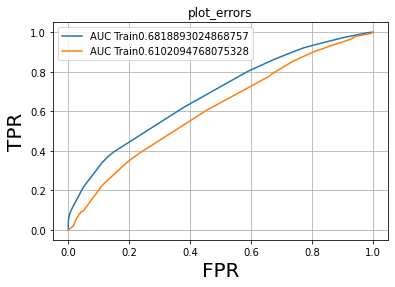

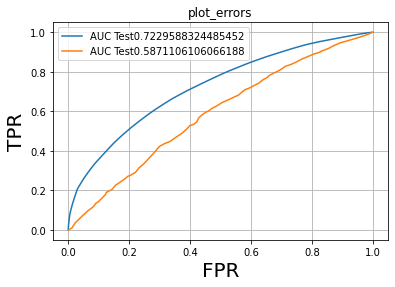

In [ ]:
# Plot confusion matrix based on best threshold value and AUC score 
import matplotlib.pyplot as plt
plt.plot(fpr_train1,tpr_train1,label='AUC Train'+str(auc(fpr_train1,tpr_train1)))
plt.plot(fpr_test1,tpr_test1,label='AUC Train'+str(auc(fpr_test1,tpr_test1)))
plt.legend()
plt.xlabel("FPR",fontsize=20)
plt.ylabel("TPR",fontsize=20)
plt.title("plot_errors")
plt.grid()
plt.show()


plt.plot(fpr_train2,tpr_train2,label='AUC Test'+str(auc(fpr_train2,tpr_train2)))
plt.plot(fpr_test2,tpr_test2,label='AUC Test'+str(auc(fpr_test2,tpr_test2)))
plt.legend()
plt.xlabel("FPR",fontsize=20)
plt.ylabel("TPR",fontsize=20)
plt.title("plot_errors")
plt.grid()
plt.show()




In [ ]:
#now finding best threshold
def best_threshold(threshold,fpr,tpr):
  thold = threshold[np.argmax(tpr*(1-fpr))]
  print("maximum value",max(tpr*(1-fpr)),"for threshold",np.round(thold,3))
  return thold

def pred_best_t(proba,threshold):
  pred =[]
  for j in proba:
    if j>= threshold:
      pred.append(1)
    else:
      pred.append(0)
  return pred


Plotting the  confusion matrix based on best threshold value

maximum value 0.3849037013535599 for threshold 0.495


Text(33.0, 0.5, 'actual value')

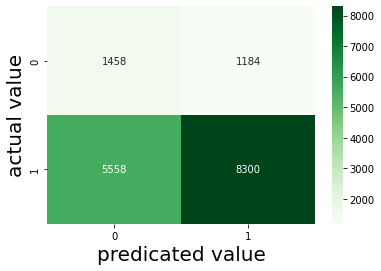

In [ ]:
from sklearn.metrics import confusion_matrix
t1_best = best_threshold(threshold_tr1,fpr_train1,tpr_train1)
y1_test = pred_best_t(y_te_pred1,t1_best)
con_mat1 = confusion_matrix(y_test,y1_test)

xa = plt.subplot()
sns.heatmap(con_mat1,annot=True,fmt="d",cmap="Greens")
xa.set_xlabel("predicated value",fontsize=20)
xa.set_ylabel("actual value",fontsize=20)


maximum value 0.4375116928536909 for threshold 0.492


Text(33.0, 0.5, 'actual value')

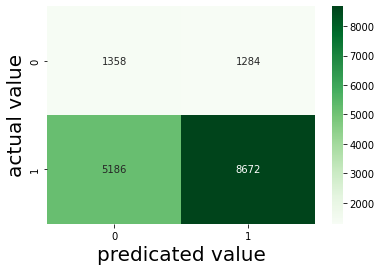

In [ ]:
t2_best = best_threshold(threshold_tr2,fpr_train2,tpr_train2)
y2_test = pred_best_t(y_te_pred2,t2_best)
con_mat1 = confusion_matrix(y_test,y2_test)

xa = plt.subplot()
sns.heatmap(con_mat1,annot=True,fmt="d",cmap="Greens")
xa.set_xlabel("predicated value",fontsize=20)
xa.set_ylabel("actual value",fontsize=20)

In [ ]:
print(len(y_test),len(y_te_pred1))

16500 16500


In [ ]:
print(len(y_test),len(y_te_pred2))

16500 16500


In [ ]:
y_test.reset_index(drop=True,inplace=True)
y_test

0        1
1        1
2        1
3        1
4        0
        ..
16495    1
16496    1
16497    1
16498    1
16499    1
Name: project_is_approved, Length: 16500, dtype: int64

In [ ]:
predicts_test  = pred_best_t(y_tr_pred2,t2_best)

In [ ]:
false_indices = []
for i in range(len(y_test)):
  if (y_test[i]==0)&(predicts_test[i]==1):
    false_indices.append(i)

len(false_indices)

1589

Word Cloud

In [ ]:
import pandas as pd
col = x_test.columns
x_te_fal_pos = pd.DataFrame(columns=col)
x_te_fal_pos = x_test.iloc[false_indices]
print(x_te_fal_pos.shape)

(1589, 8)


In [ ]:
x_te_fal_pos.head(2)

,school_state,teacher_prefix,project_grade_category,teacher_number_of_previously_posted_projects,clean_categories,clean_subcategories,essay,price
9949,ca,ms,grades_3_5,11,literacy_language,literature_writing,i teacher librarian working california inner c...,273.62
11274,mn,ms,grades_prek_2,3,health_sports,health_wellness nutritioneducation,my students diverse group children they come m...,1346.34


In [ ]:
from wordcloud import WordCloud,STOPWORDS

word_comment = ' ' #https://www.geeksforgeeks.org/generating-word-cloud-python/
stopwrd = set(STOPWORDS)
for words in x_te_fal_pos['essay']:
  value = str(words)
  token = value.split()
  for i in range(len(token)):
    token[i] = token[i].lower()
  for word in token:
    word_comment = word_comment + word + ' '





In [ ]:
wrdcld = WordCloud(width = 800, height = 800, background_color = 'black', stopwords = stopwrd,min_font_size=10 ).generate(word_comment)

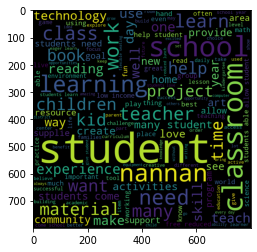

In [ ]:
plt.imshow(wrdcld)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



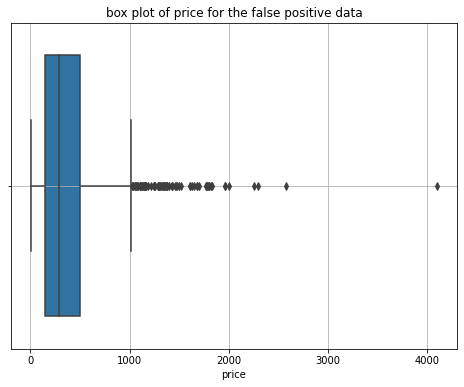

In [ ]:
#boxplot


plt.figure(figsize=(8,6))
sns.boxplot('price',data=x_te_fal_pos,orient='h').set_title("box plot of price for the false positive data")
plt.grid()


[9.60352423e-01 2.83196979e-02 5.03461296e-03 1.88797986e-03
 1.25865324e-03 1.25865324e-03 6.29326621e-04 6.29326621e-04
 0.00000000e+00 6.29326621e-04]
[  0.   26.2  52.4  78.6 104.8 131.  157.2 183.4 209.6 235.8 262. ]


Text(0.5, 0, 'teacher_number_of_previously_posted_projects')

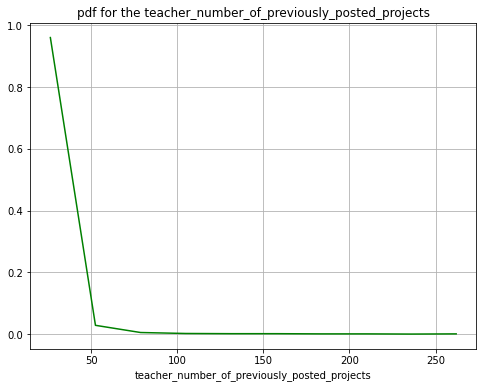

In [ ]:
#plotting the pdf for teacher number of previous posted project

plt.figure(figsize=(8,6))
plt.grid()
counts,bin_edges = np.histogram(x_te_fal_pos['teacher_number_of_previously_posted_projects'],bins=10,density=True)
pdf = counts/(sum(counts))
print(pdf)
print(bin_edges)
plt.plot(bin_edges[1:],pdf,color='green')
plt.title('pdf for the teacher_number_of_previously_posted_projects' )
plt.xlabel('teacher_number_of_previously_posted_projects')






# <font color='red'> <b>Task - 2</b></font>

In [ ]:
dtc_feature = DecisionTreeClassifier(class_weight="balanced",min_samples_split=minsplitbest1,max_depth=None)
dtc_feature.fit(x_tr1,y_train)





DecisionTreeClassifier(class_weight='balanced', min_samples_split=500)

In [ ]:
impt_features = np.nonzero(dtc_feature.feature_importances_)[0]
c = 0
for j in range(len(dtc_feature.feature_importances_)):
  if dtc_feature.feature_importances_[j]>0:
    c = c + 1
c


348

In [ ]:
dtc_feature.feature_importances_
len(impt_features)

348

In [ ]:
x_tr_impt_feature = x_tr1[:,impt_features]
x_te_impt_feature = x_te1[:,impt_features]


print('feature importance before',x_tr1.shape,x_te1.shape)
print('feature importance after',x_tr_impt_feature.shape,x_te_impt_feature.shape)



feature importance before (22445, 5256) (16500, 5256)
feature importance after (22445, 348) (16500, 348)


In [ ]:
x_tr1[0:,10]

<22445x1 sparse matrix of type '<class 'numpy.float64'>'
	with 153 stored elements in Compressed Sparse Row format>

In [ ]:
dtc_feature.fit(x_tr_impt_feature,y_train)


DecisionTreeClassifier(class_weight='balanced', min_samples_split=500)

In [ ]:
y_tr_pred_feature = dtc_feature.predict_proba(x_tr_impt_feature)[:,1] #probability score prediction
y_te_pred_feature = dtc_feature.predict_proba(x_te_impt_feature)[:,1]


In [ ]:
tr_feature_fpr,tr_feature_tpr,tr_feature_threshold = roc_curve(y_train,y_tr_pred_feature)#fpr , tpr, threshold for train data of roc curve
te_feature_fpr,te_feature_tpr,te_feature_threshold = roc_curve(y_test,y_te_pred_feature)#fpr , tpr, threshold for test data of roc curve


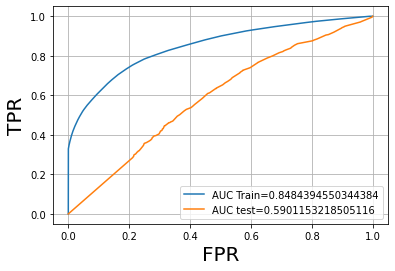

In [ ]:
plt.plot(tr_feature_fpr,tr_feature_tpr,label="AUC Train=" +str(auc(tr_feature_fpr,tr_feature_tpr))) #plotting the graph for fpr vs tpr
plt.plot(te_feature_fpr,te_feature_tpr,label="AUC test=" +str(auc(te_feature_fpr,te_feature_tpr)))
plt.legend()
plt.xlabel("FPR",fontsize=20)
plt.ylabel("TPR",fontsize=20)
plt.grid()
plt.show()


Summary

In [ ]:
from prettytable import PrettyTable
from prettytable import ALL as ALL
tab = PrettyTable(hrules=ALL)
tab.field_names=['s.no','Vectorizer','Model','HyperParameter','AUC-Test']
tab.add_row([1,'TF-IDF','Decision Tree','max_depth =10 min_sample_split=500','Test-AUC=0.58'])
tab.add_row([2,'TF-IDF NON ZERO FEATURE IMPORTANCE','Decision Tree','max_depth =10 min_sample_split=500','Test-AUC=0.59'])
print(tab)

+------+------------------------------------+---------------+------------------------------------+---------------+
| s.no |             Vectorizer             |     Model     |           HyperParameter           |    AUC-Test   |
+------+------------------------------------+---------------+------------------------------------+---------------+
|  1   |               TF-IDF               | Decision Tree | max_depth =10 min_sample_split=500 | Test-AUC=0.58 |
+------+------------------------------------+---------------+------------------------------------+---------------+
|  2   | TF-IDF NON ZERO FEATURE IMPORTANCE | Decision Tree | max_depth =10 min_sample_split=500 | Test-AUC=0.59 |
+------+------------------------------------+---------------+------------------------------------+---------------+
